<a href="https://colab.research.google.com/github/juanesmillo/03MAIR---Algoritmos-de-Optimizacion/blob/master/AG3/Juan_Esteban_Jaramillo_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG3 Actividad Guiada 3  <br>
Juan Esteban Jaramillo García <br>
https://github.com/juanesmillo/03MAIR---Algoritmos-de-Optimizacion/tree/master/AG3

In [2]:
import urllib.request

file = "swiss42.tsp"

urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp", file)

('swiss42.tsp', <http.client.HTTPMessage at 0x7f42809ebda0>)

In [4]:
!pip install tsplib95

    100% |████████████████████████████████| 1.6MB 16.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/44/c0/34/6f98693a554301bdb405f8d65d95bbcd3e50180cbfdd98a94e
Successfully built networkx
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: networkx 2.2
    Uninstalling networkx-2.2:
      Successfully uninstalled networkx-2.2


In [0]:
import tsplib95
import random
from math import e

problem = tsplib95.load_problem(file)


#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges()) 

In [7]:
print("Nodos", Nodos)
print("Aristas", Aristas)

Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

In [6]:
#Devuelve el factorial de un numero
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
      
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 


#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.wfunc(a,b)

#Devuelve la distancia total de una trayectoria
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


solucion = crear_solucion(Nodos)

distancia_total(solucion, problem)

4914

In [7]:
def busqueda_aleatoria(problem, N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  for i in range(N):
    solucion = crear_solucion(Nodos)
    distancia = distancia_total(solucion, problem)
    
    if distancia < mejor_distancia:
      mejor_solucion = solucion
      mejor_distancia = distancia
      
  print("Mejor solucion es ", mejor_solucion)
  print("Mejor distancia es ", mejor_distancia)
  return mejor_solucion
    

sol=busqueda_aleatoria(problem, 50000)   

Mejor solucion es  [0, 4, 38, 22, 30, 11, 23, 41, 39, 17, 33, 10, 12, 27, 29, 36, 28, 9, 26, 1, 5, 19, 18, 2, 3, 35, 14, 15, 37, 7, 8, 40, 24, 21, 20, 25, 13, 6, 16, 34, 32, 31]
Mejor distancia es  3600


In [8]:
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      
      distancia_vecina = distancia_total(vecina, problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

solucion = crear_solucion(Nodos)
print(solucion)

nueva_solucion = genera_vecina(solucion)
print(nueva_solucion)

[0, 9, 28, 27, 32, 30, 5, 10, 18, 37, 24, 34, 4, 20, 25, 2, 3, 6, 19, 35, 31, 29, 39, 14, 1, 22, 21, 41, 11, 33, 8, 16, 17, 12, 26, 7, 36, 40, 23, 15, 13, 38]
[0, 9, 28, 27, 32, 30, 5, 10, 18, 37, 24, 34, 4, 20, 33, 2, 3, 6, 19, 35, 31, 29, 39, 14, 1, 22, 21, 41, 11, 25, 8, 16, 17, 12, 26, 7, 36, 40, 23, 15, 13, 38]


In [10]:
def busqueda_local(problem, N):
  mejor_solucion = []
  mejor_distancia = 10e100
  
  Nodos = list(problem.get_nodes())
  solucion_referencia = crear_solucion(Nodos)
  
  for i in range(N):
    vecina = genera_vecina(solucion_referencia)
    distancia_vecina = distancia_total(vecina, problem)
    
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
      
    solucion_referencia = vecina
      
  print("Mejor solucion es ", mejor_solucion)
  print("Mejor distancia es ", mejor_distancia)
  return mejor_solucion
      
sol = busqueda_local(problem, 100)
  

  

Mejor solucion es  [0, 27, 28, 30, 29, 2, 3, 4, 6, 18, 12, 10, 8, 23, 41, 25, 11, 26, 5, 1, 32, 34, 20, 36, 35, 33, 38, 22, 39, 21, 24, 40, 9, 13, 19, 31, 17, 37, 15, 16, 14, 7]
Mejor distancia es  1742


In [0]:
def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  
  return vecina

def probabilidad(T,d):
  r=random.random();
  if(r <= (e**(-1*d)/(T*1.0))):
    return True
  else:
    return False
  
def bajar_temperatura(T):
  return T-1

In [66]:
def recocido_simulado(problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  while TEMPERATURA > 0:
    #Genera una solución vecina(aleatoria)
    vecina = genera_vecina_aleatorio(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
    
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol = recocido_simulado(problem, 10000)


La mejor solución encontrada es [0, 32, 34, 20, 31, 7, 6, 5, 26, 18, 12, 11, 14, 16, 15, 4, 3, 2, 27, 28, 30, 29, 39, 21, 24, 40, 8, 10, 25, 41, 23, 9, 22, 38, 33, 35, 36, 17, 37, 19, 13, 1]
con una distancia total de 1731


In [0]:
def Add_Nodo(problem, H ,T ) :
  #Establecer una una funcion de probabilidad para 
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )


def Incrementa_Feromona(problem, T, H):
  #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

In [68]:
def hormigas(problem, N) :
  #problem = datos del problema
  #N = Número de agentes(hormigas)
    
  #Nodos
  Nodos = list(problem.get_nodes())
    #Aristas
  Aristas = list(problem.get_edges()) 
  
  #Inicializa las aristas con una cantidad inicial de feromonas:1
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]
  
  #Recorre cada agente construyendo la solución
  for h in range(N) :
    #print("\nAgente:", h)
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1) :
      
      #Elige el siguiente nodo
      Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      
      Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N) :
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  print(mejor_solucion)
  print(mejor_distancia)
  return mejor_solucion
  
hormigas(problem, 1000)



[0, 18, 26, 7, 29, 28, 13, 23, 30, 41, 39, 38, 21, 40, 11, 5, 14, 17, 20, 24, 10, 16, 4, 8, 32, 33, 34, 9, 31, 12, 27, 1, 3, 37, 6, 36, 15, 35, 19, 2, 22, 25]
4053


[0,
 18,
 26,
 7,
 29,
 28,
 13,
 23,
 30,
 41,
 39,
 38,
 21,
 40,
 11,
 5,
 14,
 17,
 20,
 24,
 10,
 16,
 4,
 8,
 32,
 33,
 34,
 9,
 31,
 12,
 27,
 1,
 3,
 37,
 6,
 36,
 15,
 35,
 19,
 2,
 22,
 25]

La mejor solución encontrada es [0, 19, 13, 5, 26, 6, 4, 3, 32, 34, 33, 20, 35, 36, 37, 18, 11, 12, 14, 16, 15, 1, 29, 39, 24, 40, 21, 9, 8, 2, 27, 28, 30, 38, 22, 23, 41, 10, 25, 7, 17, 31]
con una distancia total de 1942
[('0', '19'), ('19', '13'), ('13', '5'), ('5', '26'), ('26', '6'), ('6', '4'), ('4', '3'), ('3', '32'), ('32', '34'), ('34', '33'), ('33', '20'), ('20', '35'), ('35', '36'), ('36', '37'), ('37', '18'), ('18', '11'), ('11', '12'), ('12', '14'), ('14', '16'), ('16', '15'), ('15', '1'), ('1', '29'), ('29', '39'), ('39', '24'), ('24', '40'), ('40', '21'), ('21', '9'), ('9', '8'), ('8', '2'), ('2', '27'), ('27', '28'), ('28', '30'), ('30', '38'), ('38', '22'), ('22', '23'), ('23', '41'), ('41', '10'), ('10', '25'), ('25', '7'), ('7', '17'), ('17', '31')]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


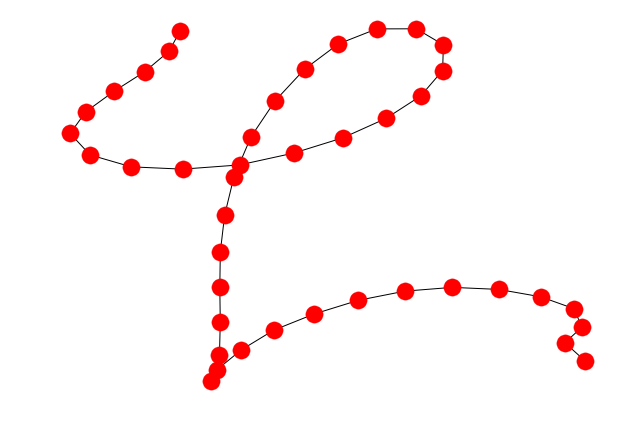

In [72]:
#Este Código sirve para generar el gráfico de un grafo usando las librerías networkx y matplotlib
import networkx as nx
import matplotlib.pyplot as plt


def pintar_grafo(sol):
  g=nx.Graph()
  for i in range(len(sol)-1):
    g.add_edge(str(sol[i]),str(sol[i+1]))
    
  print(g.edges)
  # Generamos la gráfica con la instruccion nx
  nx.draw(g)
  # Mostramos el grafo
  plt.show()

sol = recocido_simulado(problem, 10000)
pintar_grafo(sol)

[0, 22, 39, 26, 23, 25, 11, 38, 33, 29, 9, 21, 32, 30, 8, 40, 3, 12, 17, 24, 4, 6, 41, 27, 7, 35, 5, 28, 10, 2, 15, 31, 36, 37, 19, 16, 14, 1, 20, 34, 18, 13]
3881
[('0', '22'), ('22', '39'), ('39', '26'), ('26', '23'), ('23', '25'), ('25', '11'), ('11', '38'), ('38', '33'), ('33', '29'), ('29', '9'), ('9', '21'), ('21', '32'), ('32', '30'), ('30', '8'), ('8', '40'), ('40', '3'), ('3', '12'), ('12', '17'), ('17', '24'), ('24', '4'), ('4', '6'), ('6', '41'), ('41', '27'), ('27', '7'), ('7', '35'), ('35', '5'), ('5', '28'), ('28', '10'), ('10', '2'), ('2', '15'), ('15', '31'), ('31', '36'), ('36', '37'), ('37', '19'), ('19', '16'), ('16', '14'), ('14', '1'), ('1', '20'), ('20', '34'), ('34', '18'), ('18', '13')]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


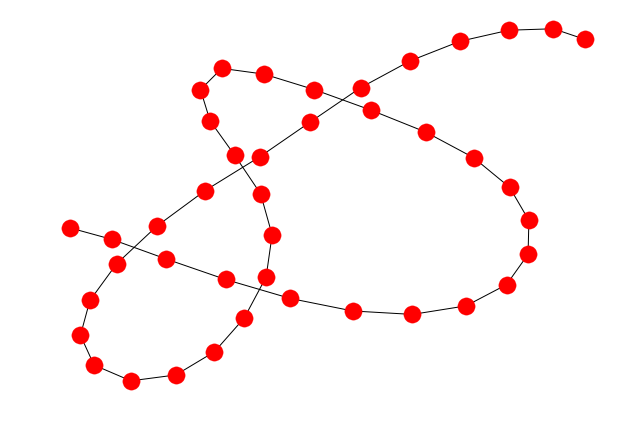

In [73]:
#Graficamos el algoritmo de la colonia
sol = hormigas(problem, 1000)
pintar_grafo(sol)